<a href="https://colab.research.google.com/github/SP1910/Stock-Price-Predictor/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Stock Price Predictor model CNN-LSTM Model.
To predict future stocks of Company, enter the ticker code of the company
We have used data from 1 Jan 2010 to 1 Jan 2025 to predict Stock Prices of next 10 days.

[*********************100%***********************]  1 of 1 completed

Price          Close        RSI
Ticker          TSLA           
Date                           
2011-04-12  1.643333        NaN
2011-04-13  1.662000        NaN
2011-04-14  1.676000        NaN
2011-04-15  1.705333        NaN
2011-04-18  1.668667        NaN
2011-04-19  1.677333        NaN
2011-04-20  1.716667        NaN
2011-04-21  1.782667        NaN
2011-04-25  1.759333        NaN
2011-04-26  1.795333        NaN
2011-04-27  1.805333        NaN
2011-04-28  1.844000        NaN
2011-04-29  1.840000        NaN
2011-05-02  1.830000        NaN
2011-05-03  1.791333  69.821384
2011-05-04  1.779333  65.999941
2011-05-05  1.762667  61.732895
2011-05-06  1.808000  63.321844
2011-05-09  1.860667  73.920220
2011-05-10  1.888667  75.118850
Epoch 1/50



<ipython-input-75-962225e7c5e2>:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0230 - val_loss: 0.0026
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024 - val_loss: 9.6947e-04
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - val_loss: 8.6272e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 9.7969e-04
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 7.1639e-04
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 7.0856e-04
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011 - val_loss: 6.1794e-04
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

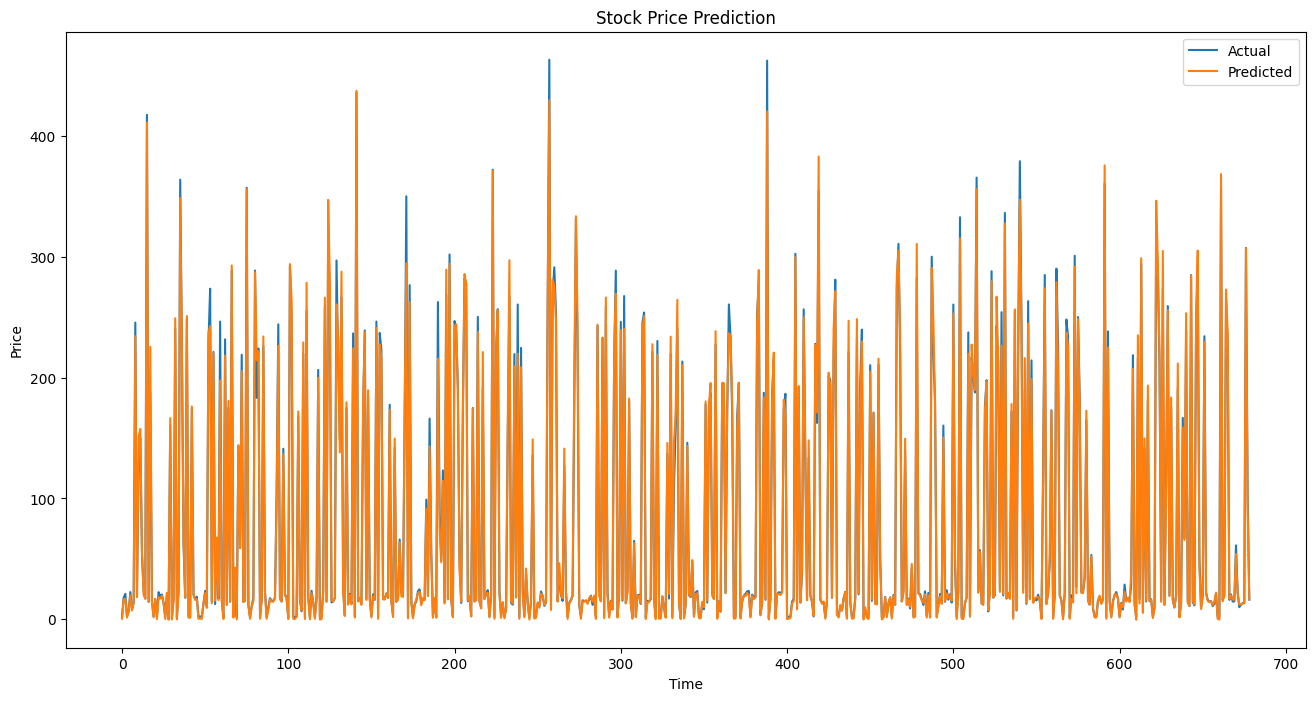

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted price for next day: $418.76


In [75]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Enter Ticker Code of Desired Company Here
################################################
ticker = "TSLA"
################################################
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")

# Prepare features
data['Returns'] = data['Close'].pct_change()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

data['MA200'] = data['Close'].rolling(window=200).mean()
data = data.dropna()

data['Price_Change'] = data['Close'].diff()

# Calculate gains and losses
data['Gain'] = data['Price_Change'].clip(lower=0)
data['Loss'] = -1 * data['Price_Change'].clip(upper=0)

# Calculate average gains and losses over 14 periods
data['Avg_Gain'] = data['Gain'].rolling(window=14).mean()
data['Avg_Loss'] = data['Loss'].rolling(window=14).mean()

# Calculate RS and RSI
data['RS'] = data['Avg_Gain'] / data['Avg_Loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

print(data[['Close', 'RSI']].head(20))
def add_macd(data):
    # Calculate 12-day and 26-day EMAs
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

    # Calculate MACD line
    data['MACD'] = data['EMA12'] - data['EMA26']
add_macd(data)

data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(2)
# Add more lag features as needed
data.head()

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'MA10', 'MA50', 'MA200', 'Gain','Loss','Price_Change','Avg_Gain','Avg_Loss','RS','RSI']
target = 'Close'
data = data.fillna(method='ffill').fillna(method='bfill')


# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, features.index(target)])
    return np.array(X), np.array(y)

seq_length = 60  # Number of previous days to use for prediction
X, y = create_sequences(data_scaled, seq_length)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features))),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    # Conv1D(filters=256, kernel_size=3, activation='relu'),
    # MaxPooling1D(pool_size=2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    # BatchNormalization(),
    LSTM(units=100),
    Dropout(0.2),
    Dense(50, activation='relu'),
    # Dense(25,activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), len(features), axis=1))[:, features.index(target)]
y_pred_inv = scaler.inverse_transform(np.repeat(y_pred, len(features), axis=1))[:, features.index(target)]

# Plot results
plt.figure(figsize=(16, 8))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict next day's price
last_sequence = data_scaled[-seq_length:]
next_day_pred = model.predict(np.array([last_sequence]))
next_day_price = scaler.inverse_transform(np.repeat(next_day_pred, len(features), axis=1))[0, features.index(target)]
print(f"Predicted price for next day: ${next_day_price:.2f}")


In [78]:
last_sequence = data_scaled[-seq_length:]
future_prices = []

for _ in range(30):
    next_pred = model.predict(np.array([last_sequence]))
    future_prices.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = next_pred

# Inverse transform predictions
future_prices_inv = scaler.inverse_transform(np.repeat(np.array(future_prices).reshape(-1, 1), len(features), axis=1))[:, features.index(target)]

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Print predicted prices
for date, price in zip(future_dates, future_prices_inv):
    print(f"Predicted price for {date.date()}: ${price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

[*********************100%***********************]  1 of 1 completed


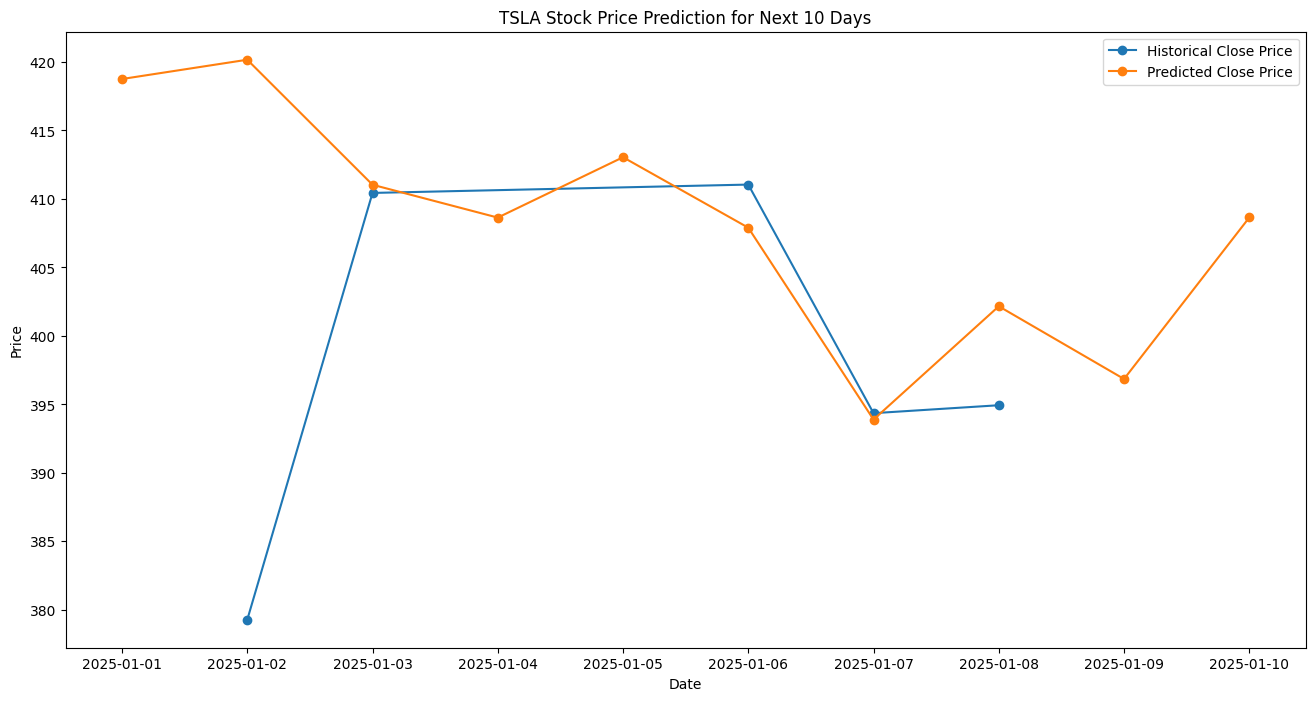

In [79]:
yfinance_data = yf.download(ticker, start="2025-01-01", end="2025-01-30")

plt.figure(figsize=(16, 8))
plt.plot(yfinance_data['Close'].iloc[:5], label='Historical Close Price', marker = 'o')
# plt.plot(data.index, data['Close'], label='Historical Close Price')
plt.plot(future_dates[:10], future_prices_inv[:10], label='Predicted Close Price', marker='o')
plt.title(f'{ticker} Stock Price Prediction for Next 10 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
future_prices_inv

array([251.24028, 247.15254, 245.58359, 245.64445, 244.93004, 247.1207 ,
       245.53395, 241.77705, 234.19684, 233.97539, 230.63298, 224.34947,
       215.39478, 213.97159, 209.69666, 204.0932 , 196.75784, 194.64005,
       190.11807, 185.62619, 180.15991, 177.65547, 173.266  , 169.83691,
       166.01775, 163.47105, 159.60547, 156.95432, 154.29533, 151.97021],
      dtype=float32)

In [72]:
data

Price,Adj Close,Close,High,Low,Open,Volume,Returns,MA50,MA10,MA200,...,Loss,Avg_Gain,Avg_Loss,RS,RSI,EMA12,EMA26,MACD,Close_lag1,Close_lag2
Ticker,RELIANCE,RELIANCE,RELIANCE,RELIANCE,RELIANCE,RELIANCE,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
